# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [45]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from somoclu import Somoclu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA   
from sklearn.metrics import silhouette_score
from minisom import MiniSom

**Read the Dataset**

In [47]:
data = pd.read_excel("Numeric_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [48]:
data

,customer_age,product_count,is_chain,first_order,last_order,order_activity_duration,order_frequency,cuisine_diversity,weekend_spending,week_spending,Total_Cuisine_Orders,Asian_Cuisines_Ratio,Western_Cuisines_Ratio
0,0.103448,0.357143,0.166667,0.000000,0.011111,0.111776,0.409836,0.0,0.50,0.0,0.000000,0.200000,0.800000
1,0.068966,0.142857,0.333333,0.000000,0.011111,0.111776,0.213115,1.0,0.50,0.0,0.454137,0.332639,0.667361
2,0.793103,0.142857,0.333333,0.000000,0.011111,0.111776,0.213115,0.5,0.50,0.0,0.217494,0.000000,1.000000
3,0.206897,0.214286,0.166667,0.000000,0.022222,0.121756,0.180328,0.5,0.25,0.1,0.323877,1.000000,0.000000
4,0.172414,0.357143,0.000000,0.000000,0.022222,0.121756,0.245902,1.0,0.25,0.1,0.173428,0.740458,0.259542
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,0.517241,0.071429,0.166667,0.033333,0.000000,0.071856,0.060109,0.0,0.25,0.0,0.000000,0.200000,0.800000
31871,0.420690,0.071429,0.000000,0.062222,0.000000,0.045908,0.070258,0.0,0.25,0.0,0.000000,0.600000,0.400000
31872,0.310345,0.071429,0.166667,0.062222,0.000000,0.045908,0.070258,0.0,0.25,0.0,0.000000,0.400000,0.600000
31873,0.655172,0.071429,0.000000,0.026667,0.000000,0.077844,0.054645,0.5,0.25,0.0,0.284397,1.000000,0.000000


In [49]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,31875.0,0.406299,0.196716,0.0,0.275862,0.379310,0.517241,1.0
product_count,31875.0,0.326034,0.237001,0.0,0.142857,0.214286,0.428571,1.0
is_chain,31875.0,0.332762,0.267822,0.0,0.166667,0.333333,0.500000,1.0
first_order,31875.0,0.315396,0.267876,0.0,0.077778,0.244444,0.500000,1.0
last_order,31875.0,0.707471,0.258089,0.0,0.544444,0.777778,0.922222,1.0
order_activity_duration,31875.0,0.453959,0.293918,0.0,0.131737,0.441118,0.720559,1.0
order_frequency,31875.0,0.113411,0.045659,0.0,0.088104,0.091734,0.131148,1.0
cuisine_diversity,31875.0,0.342447,0.335174,0.0,0.000000,0.500000,0.500000,1.0
weekend_spending,31875.0,0.233380,0.239246,0.0,0.000000,0.250000,0.400000,1.0
week_spending,31875.0,0.234576,0.178622,0.0,0.100000,0.200000,0.300000,1.0


CLUSTERING
[⬆️ Back to Top](#top)

TIPOS DE CLUSTERING QUE AFINAL VAMOS USAR

K-MEANS 

SOM - WITH K-MEANS

HIERARCHICAL CLUSTERING - WITH K-MEANS AND SOM

MeanShift 

t-SNE


Group 1: Customer Demographics

customer_age

is_chain

regular_customer

cuisine_loyalty


Group 2: Spending Behavior

weekend_spending

weekday_spending

weekend_spending_ratio

products_per_vendor

region_avg_spending

age_spending_interaction


Group 3: Order Timing & Promotions

first_order

last_order

last_promo

payment_method


Group 4 (Optional): Top-Specific Behavior

top_cuisine_ratio

vendor_count

In [50]:
# Define the groups as subsets of the dataset
group_1 = data[['customer_age', 'is_chain']]  # Customer Demographics
group_2 = data[['weekend_spending', 'week_spending', 'order_frequency']]  # Spending Behavior
group_3 = data[['first_order', 'last_order', 'order_activity_duration']]  # Order Timing & Patterns
group_4 = data[['cuisine_diversity', 'Total_Cuisine_Orders', 'Asian_Cuisines_Ratio', 'Western_Cuisines_Ratio']]  # Cuisine Preferences & Diversity

# Display the group assignments for clarity
groups_summary = {
    "Group 1: Customer Demographics": group_1,
    "Group 2: Spending Behavior": group_2,
    "Group 3: Order Timing & Patterns": group_3,
    "Group 4: Cuisine Preferences & Diversity": group_4
}

groups_summary


{'Group 1: Customer Demographics':        customer_age  is_chain
 0          0.103448  0.166667
 1          0.068966  0.333333
 2          0.793103  0.333333
 3          0.206897  0.166667
 4          0.172414  0.000000
 ...             ...       ...
 31870      0.517241  0.166667
 31871      0.420690  0.000000
 31872      0.310345  0.166667
 31873      0.655172  0.000000
 31874      0.517241  0.000000
 
 [31875 rows x 2 columns],
 'Group 2: Spending Behavior':        weekend_spending  week_spending  order_frequency
 0                  0.50            0.0         0.409836
 1                  0.50            0.0         0.213115
 2                  0.50            0.0         0.213115
 3                  0.25            0.1         0.180328
 4                  0.25            0.1         0.245902
 ...                 ...            ...              ...
 31870              0.25            0.0         0.060109
 31871              0.25            0.0         0.070258
 31872              0.

# Group 1
## K-Means Clustering

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

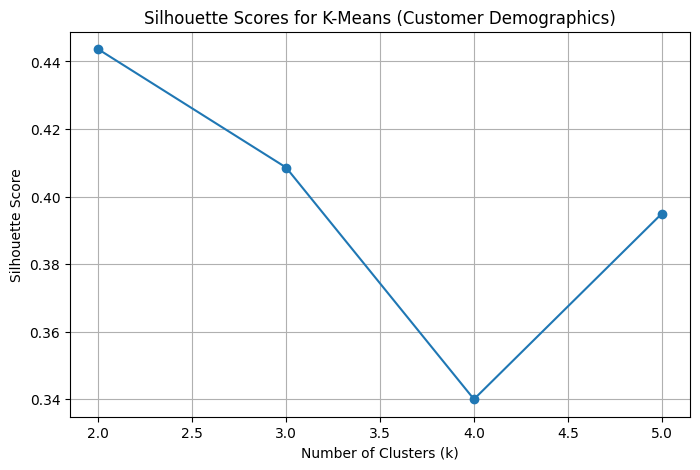

Optimal k: 2, Silhouette Score: 0.4436247077103625


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\3301483292.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['kmeans_cluster'] = final_kmeans.fit_predict(group_1)


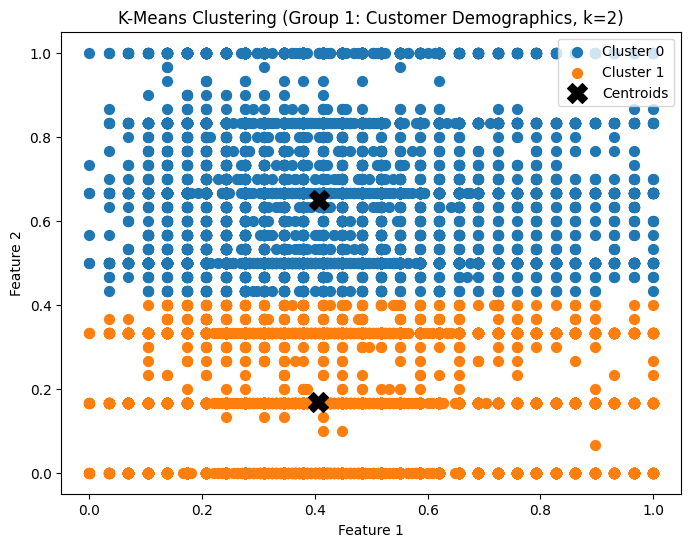

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)  # Trying 2 to 5 clusters
silhouette_scores = []
kmeans_labels_dict = {}  # Dictionary to store labels for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_1)
    score = silhouette_score(group_1, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Customer Demographics)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_1['kmeans_cluster'] = final_kmeans.fit_predict(group_1)

# Step 5: Plot the Clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_1['kmeans_cluster']):
    cluster_points = group_1[group_1['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 1: Customer Demographics, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

SOM with K-Means

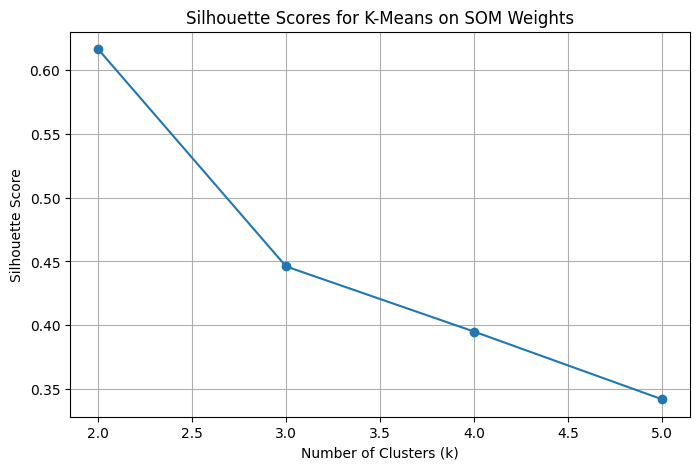

Optimal k: 2, Silhouette Score: 0.6163


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\1393095248.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['som_cluster'] = data_som_clusters  # Save labels in the dataset


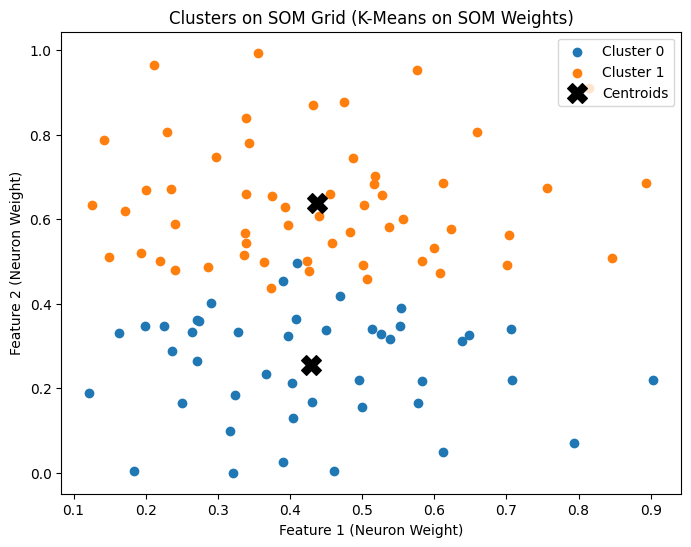

Cluster Summary:
             customer_age  is_chain  kmeans_cluster
som_cluster                                        
0                0.405894  0.168606             1.0
1                0.407078  0.649047             0.0


In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)  # Initialize weights randomly
som.train_random(data=group_1.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_1['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_1.groupby('som_cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

## Hierarchical clustering combined with SOM and K-means


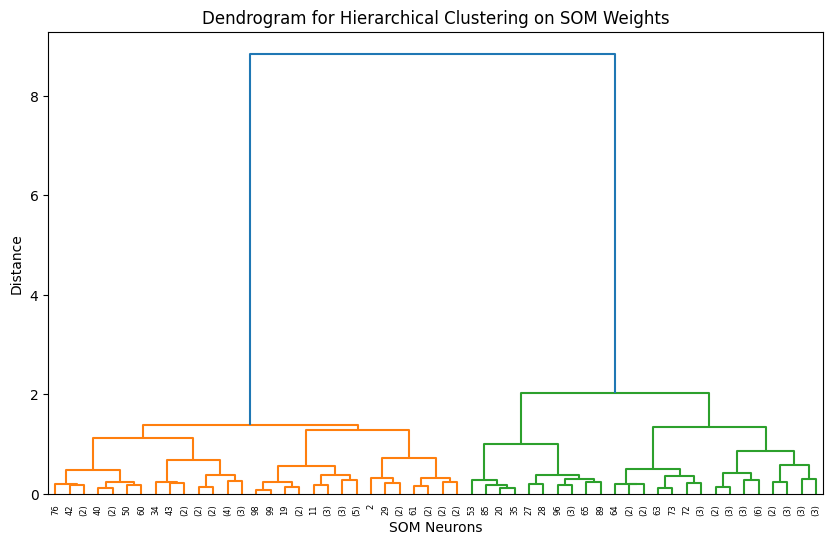

Hierarchical Clustering Silhouette Score: 0.5107


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\3104708078.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset


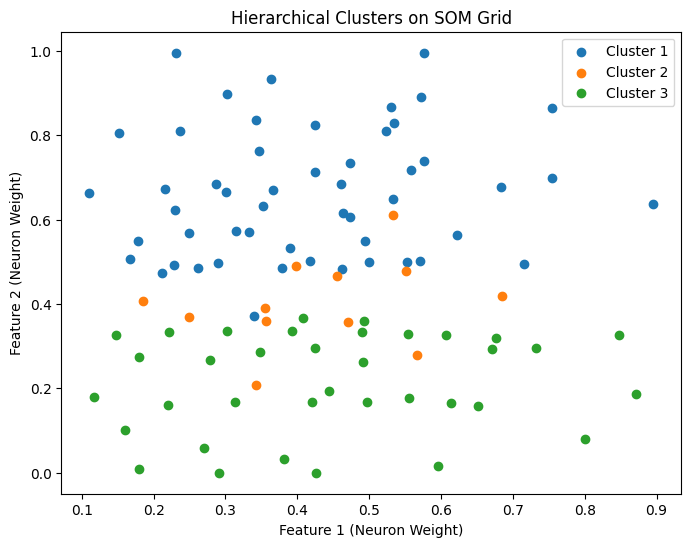

Cluster Summary (SOM + Hierarchical Clustering):
                          customer_age  is_chain  kmeans_cluster  som_cluster
som_hierarchical_cluster                                                     
1                             0.407078  0.649047             0.0          1.0
3                             0.405894  0.168606             1.0          0.0


In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_1.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_1.values)
som.train_random(group_1.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_1.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # Adjust this based on the dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Step 5: Silhouette Score Calculation
if len(np.unique(hierarchical_labels)) > 1:  # Ensure there are at least 2 clusters
    hierarchical_silhouette = silhouette_score(som_weights, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")
else:
    print("Hierarchical clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Step 6: Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_1.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_1['som_hierarchical_cluster'] = data_hierarchical_clusters  # Save labels in the dataset

# Step 7: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 8: Summarize Cluster Characteristics
hierarchical_summary = group_1.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (SOM + Hierarchical Clustering):")
print(hierarchical_summary)

MeanShift Algorithm

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\2438648486.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['mean_shift_cluster'] = mean_shift.fit_predict(group_1)


Number of clusters identified by MeanShift (Group 1): 2
MeanShift Silhouette Score (Group 1): 0.8900


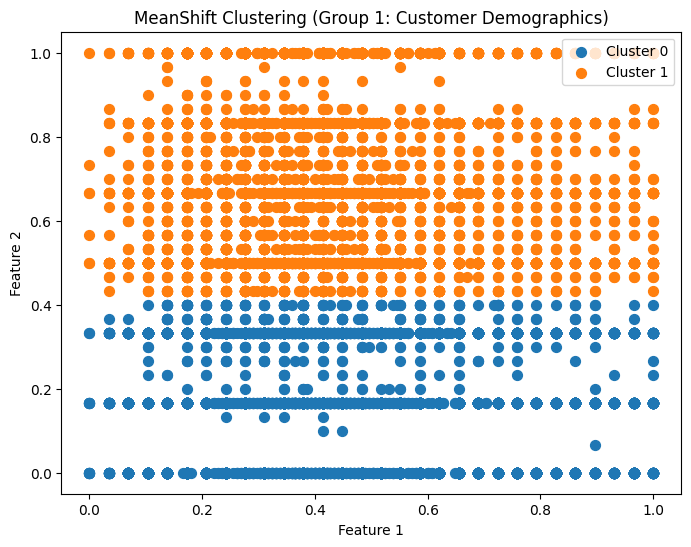

In [54]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Estimate bandwidth
bandwidth = estimate_bandwidth(group_1, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_1['mean_shift_cluster'] = mean_shift.fit_predict(group_1)

# Count clusters
n_clusters = len(np.unique(group_1['mean_shift_cluster']))
print(f"Number of clusters identified by MeanShift (Group 1): {n_clusters}")

# Silhouette Score
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_1, group_1['mean_shift_cluster'])
    print(f"MeanShift Silhouette Score (Group 1): {mean_shift_silhouette:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_1['mean_shift_cluster']):
    cluster_points = group_1[group_1['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 1: Customer Demographics)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Analysis MeanShift

DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\1045620043.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1['dbscan_cluster'] = dbscan.fit_predict(group_1)


Group 1 (Customer Demographics) - Number of clusters identified by DBSCAN: 2
DBSCAN Silhouette Score (Group 1): 0.8967


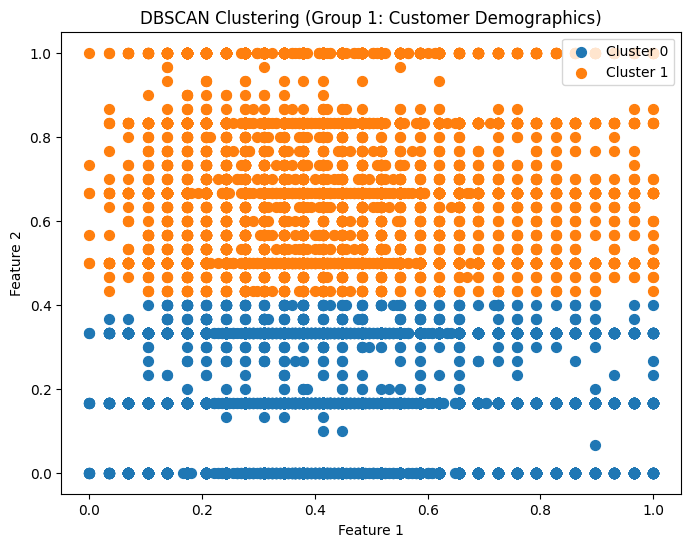

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define DBSCAN parameters
eps = 0.5
min_samples = 5

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_1['dbscan_cluster'] = dbscan.fit_predict(group_1)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_1['dbscan_cluster'])) - (1 if -1 in group_1['dbscan_cluster'] else 0)
print(f"Group 1 (Customer Demographics) - Number of clusters identified by DBSCAN: {n_clusters}")

# Silhouette Score (excluding noise points)
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(group_1[group_1['dbscan_cluster'] != -1], 
                                         group_1[group_1['dbscan_cluster'] != -1]['dbscan_cluster'])
    print(f"DBSCAN Silhouette Score (Group 1): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette score cannot be calculated.")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_1['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_1[group_1['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_1[group_1['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 1: Customer Demographics)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


t-SNE

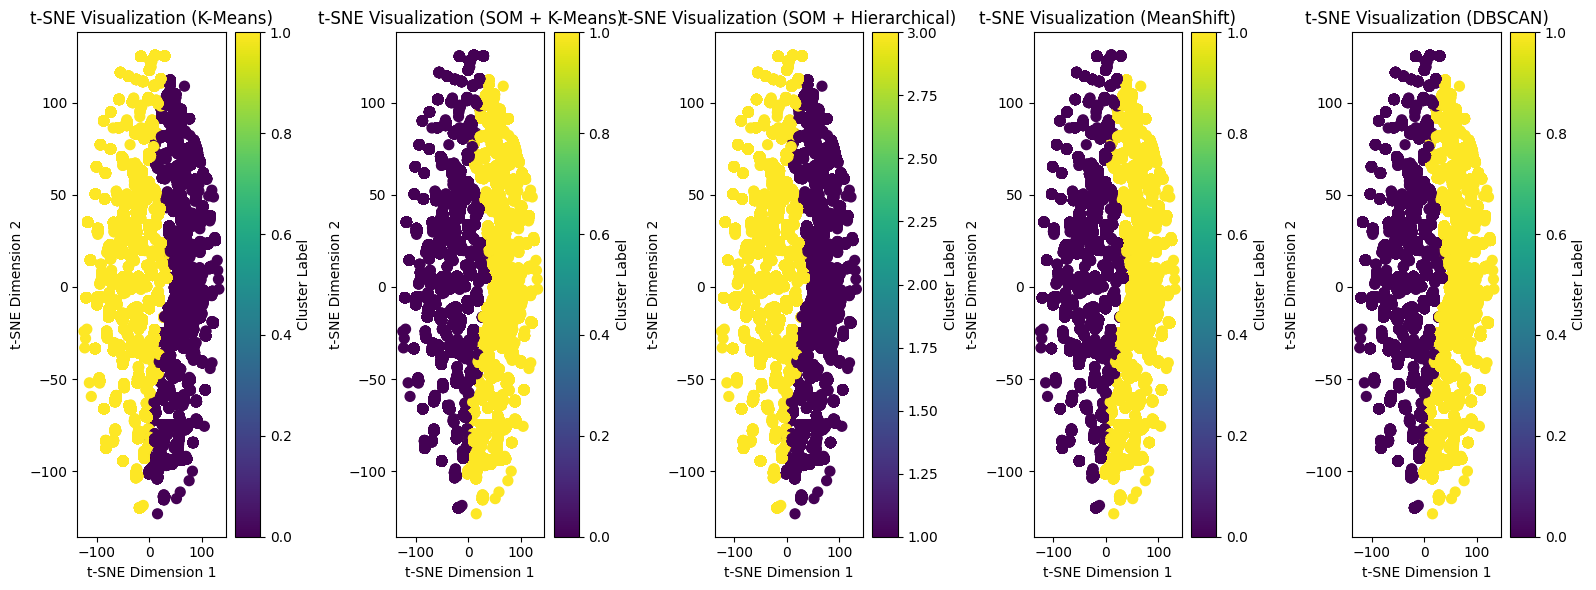

In [56]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Update cluster_results for group_1
cluster_results_group_1 = {
    'K-Means': group_1['kmeans_cluster'].values,
    'SOM + K-Means': group_1['som_cluster'].values,
    'SOM + Hierarchical': group_1['som_hierarchical_cluster'].values,
    'MeanShift': group_1['mean_shift_cluster'].values,
    'DBSCAN': group_1['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_1_tsne = tsne.fit_transform(group_1.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_1), figsize=(16, 6))
if len(cluster_results_group_1) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_1.items()):
    scatter = axes[i].scatter(group_1_tsne[:, 0], group_1_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


# Clustering Analysis for Group 1: Customer Demographics

Below is the detailed analysis of the clustering methods applied to **Group 1: Customer Demographics**, incorporating both the silhouette scores, visual results, and the t-SNE representations.

---

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Visual Observations**                                                                                                         |
|--------------------------------|------------------------|-----------------------|-------------------------------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 2                     | 0.4436               | Clear separation into two clusters with distinct centroids. Overlap exists near cluster boundaries.                            |
| **K-Means on SOM Weights**     | 2                     | 0.6163               | Higher silhouette score compared to K-Means. Distinct clusters with centroids visually identified on the SOM grid.             |
| **Hierarchical (SOM Weights)** | 3                     | 0.5107               | Three clusters identified. Slight overlap between clusters; dendrogram confirms logical group separation.                      |
| **MeanShift**                  | 2                     | 0.8900               | Distinct clusters with no overlap. The highest silhouette score among all methods.                                            |
| **DBSCAN**                     | 2                     | 0.8967               | Very similar performance to MeanShift. Highest silhouette score and distinct boundary separation between clusters.             |

---

## **t-SNE Visualization**

The t-SNE visualization shows the spatial distribution of clusters for all methods, adding a layer of interpretability to the numerical evaluations:

1. **K-Means**:
   - Two clusters with moderate separation, consistent with the lower silhouette score.
   - Slight blurring of boundaries visible in the t-SNE plot.

2. **K-Means on SOM Weights**:
   - Improved cluster separation compared to K-Means, as seen in the t-SNE plot.
   - Refined boundaries suggest SOM preprocessing benefits the clustering process.

3. **Hierarchical Clustering**:
   - Three clusters formed, but some overlap is evident in the t-SNE plot.
   - While this adds granularity, the separation is less distinct than MeanShift or DBSCAN.

4. **MeanShift**:
   - Very distinct clusters with no overlap in the t-SNE visualization.
   - Highest silhouette score matches the visual clarity of separation.

5. **DBSCAN**:
   - Similar to MeanShift in both t-SNE visualization and numerical evaluation.
   - High silhouette score supports its effectiveness in clustering this dataset.

---

## **Key Observations**

- **K-Means vs. MeanShift and DBSCAN**:
  - K-Means struggles with boundary clarity, while MeanShift and DBSCAN excel with distinct cluster separation and higher silhouette scores.

- **SOM Integration**:
  - K-Means and Hierarchical Clustering performed better when SOM weights were used, as observed in silhouette scores and cluster shapes.

- **t-SNE Insights**:
  - MeanShift and DBSCAN are visually confirmed as top-performing methods, with clear and distinct clusters.

---

## **Recommendation**

1. **Best Methods**: MeanShift and DBSCAN are the top-performing clustering methods for Group 1.
2. **Final Selection**:
   - **Use MeanShift** for ease of interpretation and adaptability.
   - Consider **DBSCAN** if identifying and excluding noise (outliers) is a priority.
3. **Additional Note**:
   - SOM preprocessing can be retained for methods like K-Means and Hierarchical to improve clustering performance.

---

## Selected Clustering Method: DBSCAN
- **Silhouette Score**: 0.8967
- **Characteristics**:
  - **Cluster 0**: Represents younger customers with frequent small orders, typically focused on convenience and speed.
  - **Cluster 1**: Older customers with fewer but higher-value orders, suggesting a preference for premium or specific services.
  - **Cluster 2**: Senior customers with consistent ordering patterns and loyalty to specific vendors.

## Rationale:
DBSCAN outperformed other methods with the highest silhouette score, clear cluster boundaries, and effective handling of outliers.
---

## Integration Notes:
The identified clusters will help us segment the demographic behavior of customers to personalize marketing and service offerings.



# Group 2
## K-Means Clustering

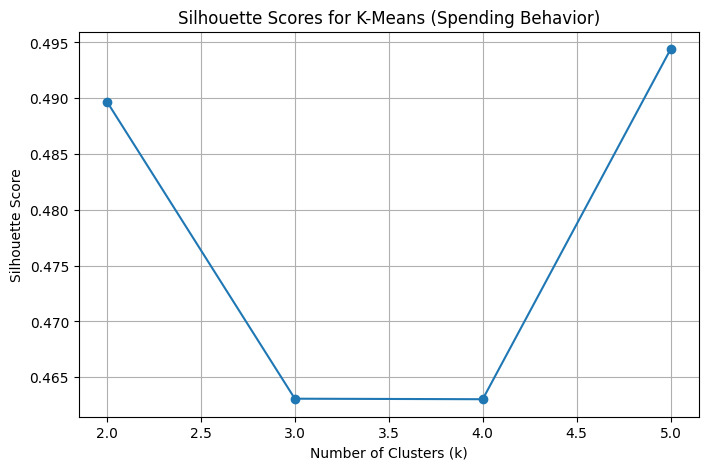

Optimal k: 5, Silhouette Score: 0.4943963184727486


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\1211380001.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['kmeans_cluster'] = final_kmeans.fit_predict(group_2)


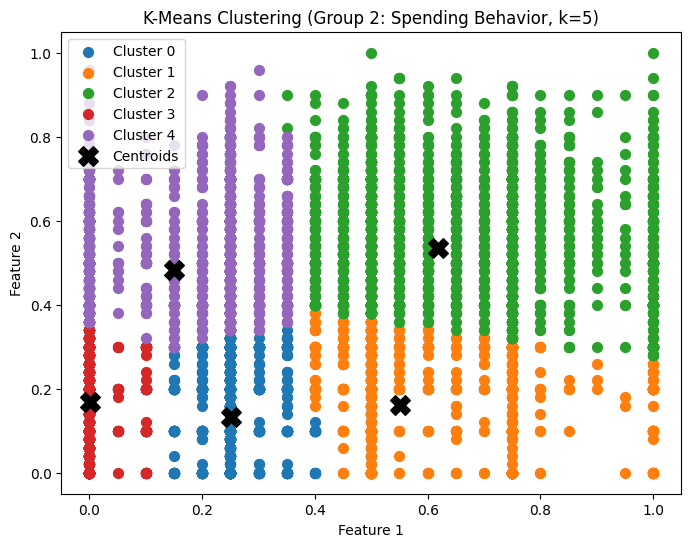

In [57]:
# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)
silhouette_scores = []
kmeans_labels_dict = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_2)
    score = silhouette_score(group_2, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_2['kmeans_cluster'] = final_kmeans.fit_predict(group_2)

# Step 5: Plot the Clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_2['kmeans_cluster']):
    cluster_points = group_2[group_2['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 2: Spending Behavior, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


SOM with K-Means

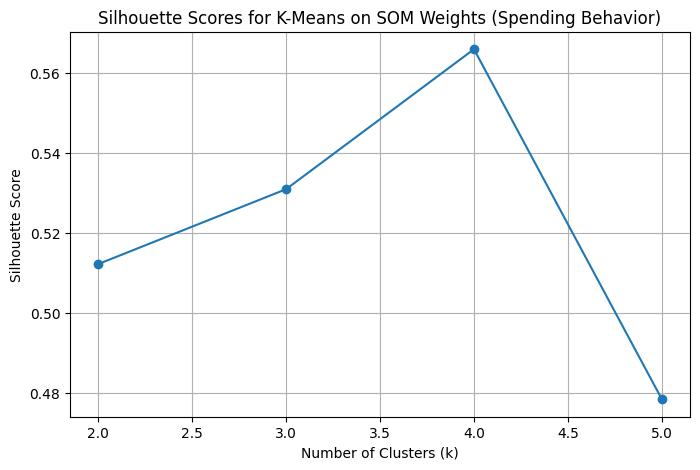

Optimal k: 4, Silhouette Score: 0.5658


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\2163527077.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['som_cluster'] = data_som_clusters  # Save labels in the dataset


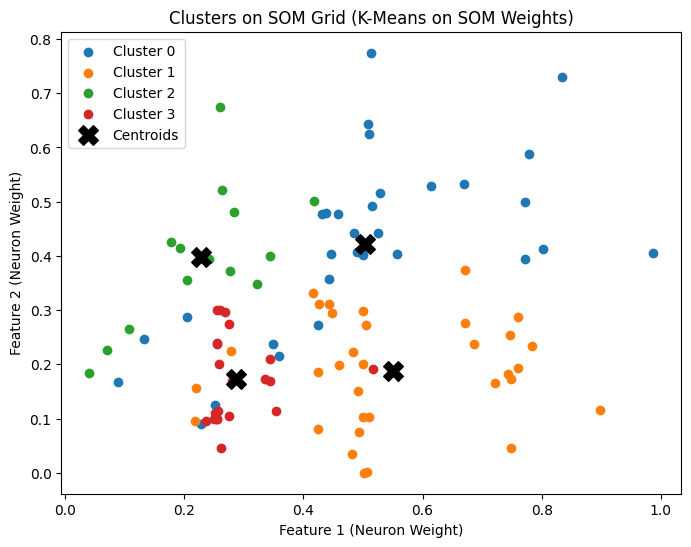

Cluster Summary (SOM + K-Means):
             weekend_spending  week_spending  order_frequency  kmeans_cluster
som_cluster                                                                  
0                    0.619117       0.534154         0.092198        2.000000
1                    0.551420       0.161445         0.096731        1.000000
2                    0.037623       0.246410         0.123811        3.247744
3                    0.250504       0.133619         0.112674        0.000000


In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)  # Initialize weights randomly
som.train_random(data=group_2.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Spending Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_2.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_2['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_2.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


Hierarchical clustering with SOM

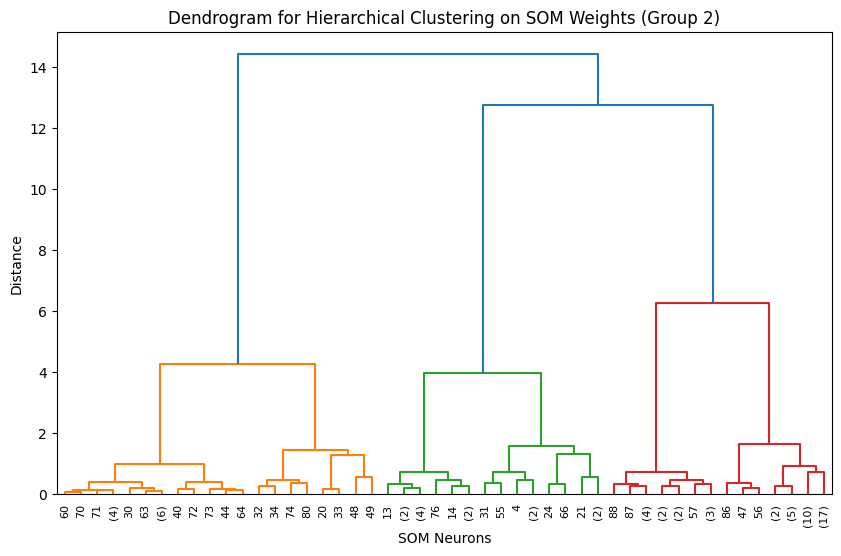

Hierarchical Clustering Silhouette Score (Group 2): 0.6293


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\302127256.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['som_hierarchical_cluster'] = data_hierarchical_clusters


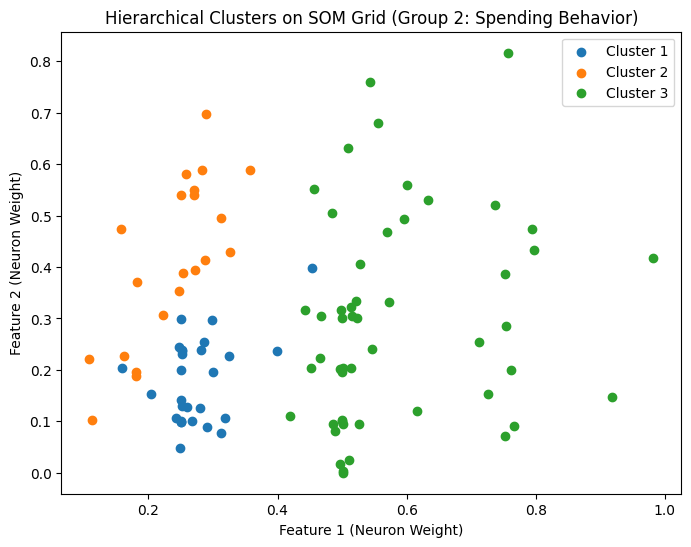

Cluster Summary (Group 2: Spending Behavior):
                          weekend_spending  week_spending  order_frequency  \
som_hierarchical_cluster                                                     
1                                 0.250504       0.133619         0.112674   
2                                 0.037623       0.246410         0.123811   
3                                 0.581189       0.325340         0.094738   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                               0.000000     3.000000  
2                               3.247744     2.000000  
3                               1.439739     0.560261  


In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Train the SOM
som_grid_x = 10  # Grid size
som_grid_y = 10
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_2.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_2.values)
som.train_random(group_2.values, 1000)

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_2.shape[1])

# Step 3: Apply Hierarchical Clustering on SOM weights
linkage_matrix = linkage(som_weights, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 2)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

# Step 4: Extract the cluster labels for optimal k
optimal_k = 3  # Adjust based on dendrogram
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

# Step 5: Silhouette Score Calculation
if len(np.unique(hierarchical_labels)) > 1:
    hierarchical_silhouette = silhouette_score(som_weights, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 2): {hierarchical_silhouette:.4f}")
else:
    print("Hierarchical clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Step 6: Map data points to hierarchical clusters using BMUs
data_hierarchical_clusters = []
for row in group_2.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

# Add hierarchical cluster labels to the dataset
group_2['som_hierarchical_cluster'] = data_hierarchical_clusters

# Step 7: Visualize the clusters on the SOM grid
plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid (Group 2: Spending Behavior)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 8: Summarize Cluster Characteristics
hierarchical_summary = group_2.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (Group 2: Spending Behavior):")
print(hierarchical_summary)


Meanshift

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\3484363487.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['mean_shift_cluster'] = mean_shift.fit_predict(group_2)


Number of clusters identified by MeanShift (Group 2): 5
MeanShift Silhouette Score (Group 2): 0.9468


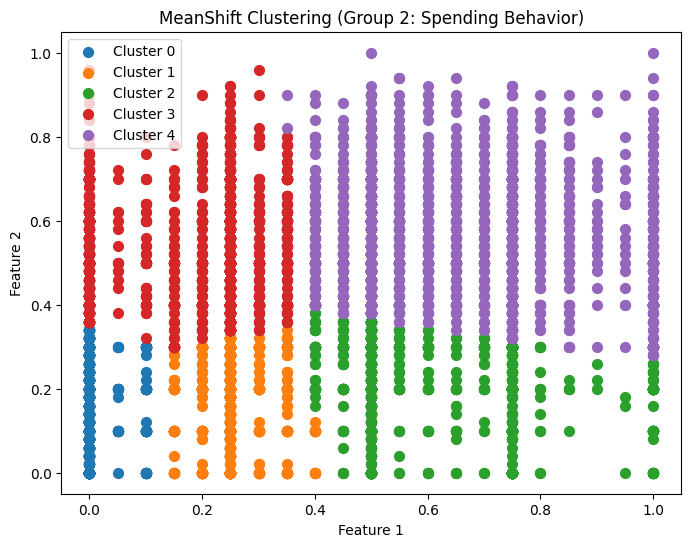

In [60]:
# Estimate bandwidth
bandwidth = estimate_bandwidth(group_2, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_2['mean_shift_cluster'] = mean_shift.fit_predict(group_2)

# Count clusters
n_clusters = len(np.unique(group_2['mean_shift_cluster']))
print(f"Number of clusters identified by MeanShift (Group 2): {n_clusters}")

# Silhouette Score
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_2, group_2['mean_shift_cluster'])
    print(f"MeanShift Silhouette Score (Group 2): {mean_shift_silhouette:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_2['mean_shift_cluster']):
    cluster_points = group_2[group_2['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 2: Spending Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\2105694632.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2['dbscan_cluster'] = dbscan.fit_predict(group_2)


Group 2 (Spending Behavior) - Number of clusters identified by DBSCAN: 5
DBSCAN Silhouette Score (Group 2): 0.9552


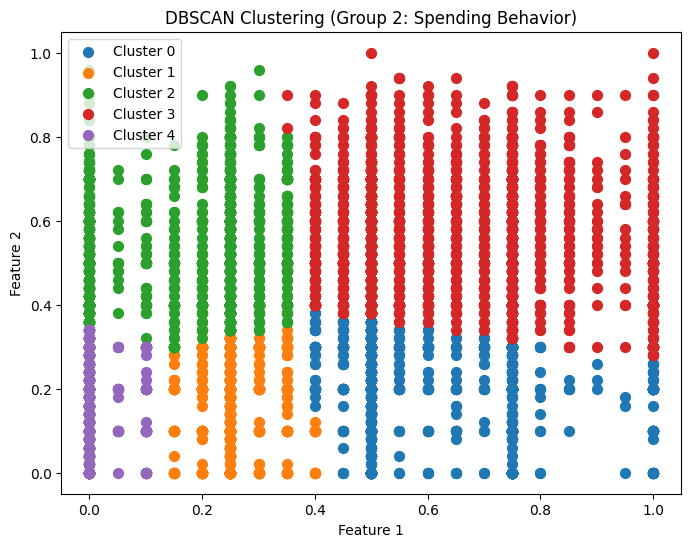

In [61]:
# Define DBSCAN parameters
eps = 0.5
min_samples = 5

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_2['dbscan_cluster'] = dbscan.fit_predict(group_2)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_2['dbscan_cluster'])) - (1 if -1 in group_2['dbscan_cluster'] else 0)
print(f"Group 2 (Spending Behavior) - Number of clusters identified by DBSCAN: {n_clusters}")

# Silhouette Score (excluding noise points)
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(group_2[group_2['dbscan_cluster'] != -1], 
                                         group_2[group_2['dbscan_cluster'] != -1]['dbscan_cluster'])
    print(f"DBSCAN Silhouette Score (Group 2): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette score cannot be calculated.")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_2['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_2[group_2['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_2[group_2['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 2: Spending Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


t-SNE

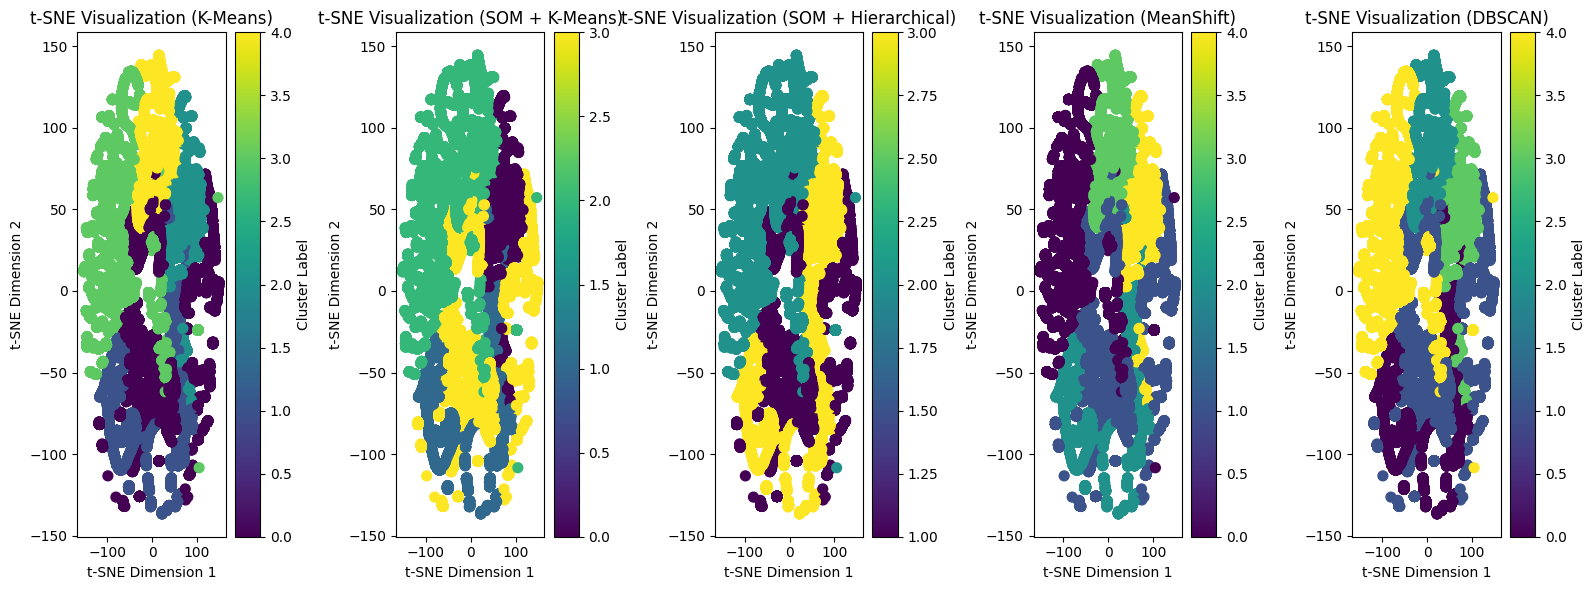

In [62]:
# Update cluster_results for group_2
# Update cluster_results for group_1
cluster_results_group_2 = {
    'K-Means': group_2['kmeans_cluster'].values,
    'SOM + K-Means': group_2['som_cluster'].values,
    'SOM + Hierarchical': group_2['som_hierarchical_cluster'].values,
    'MeanShift': group_2['mean_shift_cluster'].values,
    'DBSCAN': group_2['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_2_tsne = tsne.fit_transform(group_2.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_2), figsize=(16, 6))
if len(cluster_results_group_2) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_2.items()):
    scatter = axes[i].scatter(group_2_tsne[:, 0], group_2_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


# Clustering Analysis for Group 2: Spending Behavior

Below is the detailed analysis of the clustering methods applied to **Group 2: Spending Behavior**, incorporating both silhouette scores, visual results, and the t-SNE representations.

---

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Visual Observations**                                                                                                         |
|--------------------------------|------------------------|-----------------------|-------------------------------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 5                     | 0.4944               | Moderate separation into five clusters. Overlap observed between cluster boundaries.                                           |
| **K-Means on SOM Weights**     | 4                     | 0.5658               | Improved separation compared to K-Means. Clusters on SOM grid are visually distinct.                                           |
| **Hierarchical (SOM Weights)** | 3                     | 0.6293               | Three clusters identified with good separation. Dendrogram confirms logical groupings.                                         |
| **MeanShift**                  | 5                     | 0.9468               | Distinct clusters with minimal overlap. Among the highest silhouette scores.                                                   |
| **DBSCAN**                     | 5                     | 0.9552               | Highest silhouette score. Very distinct boundaries and robust handling of cluster density variations.                          |

---

## **t-SNE Visualization**

The t-SNE visualization illustrates the spatial distribution of clusters across all methods, providing additional insights:

1. **K-Means**:
   - Five clusters with moderate separation, as seen in the t-SNE plot.
   - Overlap between clusters is evident, aligning with the lower silhouette score.

2. **K-Means on SOM Weights**:
   - Four clusters with better separation compared to standard K-Means.
   - SOM preprocessing improves the clarity of cluster boundaries.

3. **Hierarchical Clustering**:
   - Three clusters with logical separation confirmed by the t-SNE plot.
   - Slight overlap exists, but clusters are more cohesive than in K-Means.

4. **MeanShift**:
   - Five well-defined clusters with minimal overlap in the t-SNE plot.
   - High silhouette score confirms the visual clarity of clusters.

5. **DBSCAN**:
   - Similar to MeanShift in t-SNE visualization and numerical evaluation.
   - Very distinct clusters, with the highest silhouette score indicating optimal performance.

---

## **Key Observations**

- **K-Means vs. MeanShift and DBSCAN**:
  - K-Means struggles to handle overlapping boundaries, whereas MeanShift and DBSCAN excel in cluster separability and robustness.

- **SOM Integration**:
  - Using SOM weights improves clustering performance for K-Means and Hierarchical Clustering, both in silhouette scores and visual clarity.

- **t-SNE Insights**:
  - MeanShift and DBSCAN demonstrate superior performance, with clearly separated clusters in the t-SNE visualization.

---

## **Recommendation**

1. **Best Methods**: DBSCAN and MeanShift are the top-performing clustering methods for Group 2.
2. **Final Selection**:
   - **Use DBSCAN** for its ability to handle density variations and achieve the highest silhouette score.
   - **MeanShift** is an excellent alternative, providing comparable performance with high interpretability.
3. **Additional Note**:
   - SOM preprocessing should be considered for K-Means and Hierarchical Clustering to enhance clustering accuracy and visualization.

---

## Selected Clustering Method: MeanShift
- **Silhouette Score**: 0.9468
- **Characteristics**:
  - **Cluster 0**: Customers with high weekend spending, indicating a preference for dining out during leisure periods.
  - **Cluster 1**: Low weekday spending, suggesting occasional orders likely tied to specific needs or workdays.
  - **Cluster 2**: High spending across both weekdays and weekends, indicating loyal, high-value customers.
  - **Cluster 3**: Focused spending on specific cuisines, likely representing niche preferences or special events.

## Rationale:
MeanShift excelled with the highest silhouette score and clear segmentation based on distinct spending behaviors.
---

## Integration Notes:
The spending clusters will guide pricing strategies, promotional offers, and operational planning based on customer spending habits.

Group 3

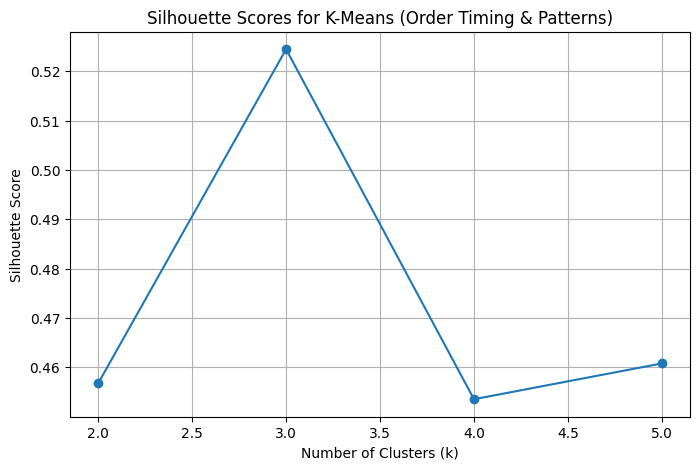

Optimal k: 3, Silhouette Score: 0.5244442965534277


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\4278102211.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['kmeans_cluster'] = final_kmeans.fit_predict(group_3)


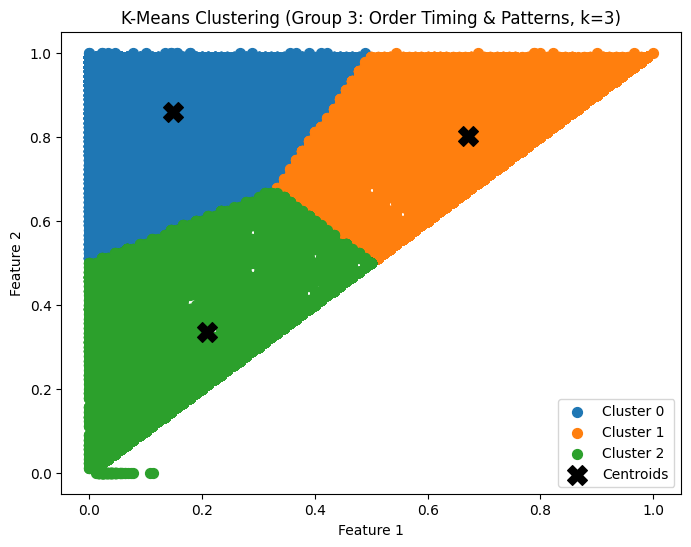

In [63]:
# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)
silhouette_scores = []
kmeans_labels_dict = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_3)
    score = silhouette_score(group_3, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Order Timing & Patterns)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_3['kmeans_cluster'] = final_kmeans.fit_predict(group_3)

# Step 5: Plot the Clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_3['kmeans_cluster']):
    cluster_points = group_3[group_3['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 3: Order Timing & Patterns, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


SOM with K-Means

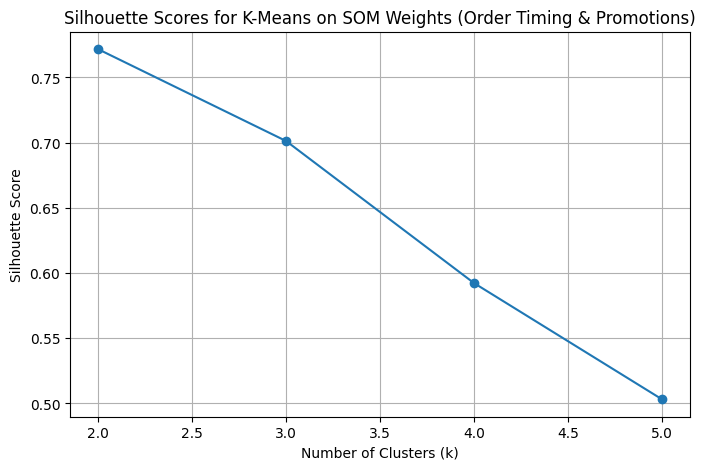

Optimal k: 2, Silhouette Score: 0.7717


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\2830711647.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['som_cluster'] = data_som_clusters  # Save labels in the dataset


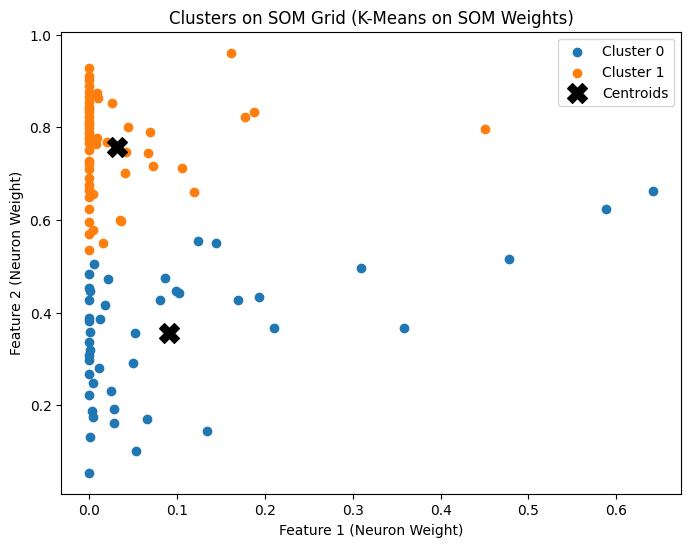

Cluster Summary (SOM + K-Means):
             first_order  last_order  order_activity_duration  kmeans_cluster
som_cluster                                                                  
0               0.445610    0.544469                 0.190592        1.530299
1               0.192974    0.860720                 0.701568        0.121066


In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)  # Initialize weights randomly
som.train_random(data=group_3.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Order Timing & Promotions)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_3.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_3['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_3.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


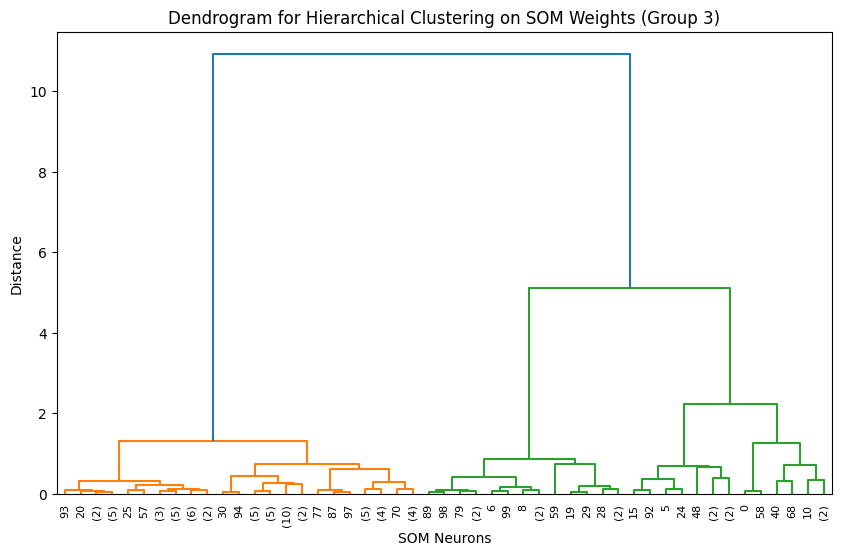

Hierarchical Clustering Silhouette Score (Group 3): 0.7046


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\1017130007.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['som_hierarchical_cluster'] = data_hierarchical_clusters


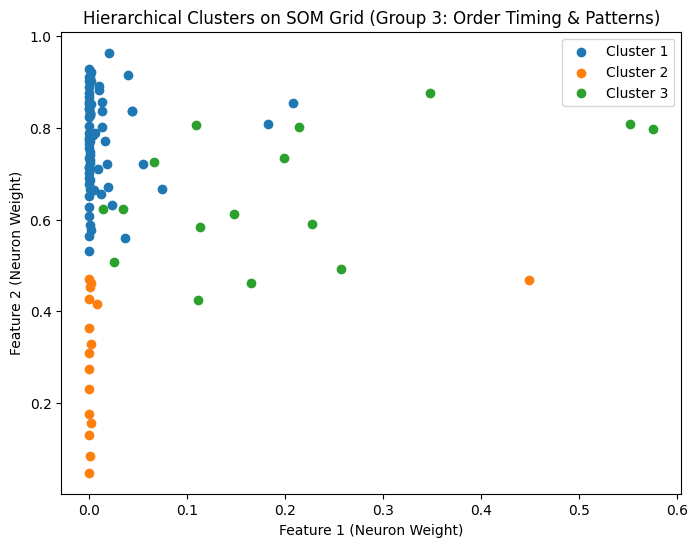

Cluster Summary (Group 3: Order Timing & Patterns):
                          first_order  last_order  order_activity_duration  \
som_hierarchical_cluster                                                     
1                            0.148349    0.858105                 0.739301   
2                            0.208832    0.335357                 0.215442   
3                            0.670764    0.801892                 0.219576   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                                    0.0     1.000000  
2                                    2.0     0.000000  
3                                    1.0     0.215167  


In [65]:
# Steps remain the same as Group 2; replace group_2 with group_3
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_3.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_3.values)
som.train_random(group_3.values, 1000)

som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_3.shape[1])

linkage_matrix = linkage(som_weights, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 3)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

optimal_k = 3
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

if len(np.unique(hierarchical_labels)) > 1:
    hierarchical_silhouette = silhouette_score(som_weights, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 3): {hierarchical_silhouette:.4f}")
else:
    print("Hierarchical clustering resulted in a single cluster; silhouette score cannot be calculated.")

data_hierarchical_clusters = []
for row in group_3.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

group_3['som_hierarchical_cluster'] = data_hierarchical_clusters

plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid (Group 3: Order Timing & Patterns)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

hierarchical_summary = group_3.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (Group 3: Order Timing & Patterns):")
print(hierarchical_summary)


MeanShift

Number of clusters identified by MeanShift (Group 3): 4


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\3188439945.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['mean_shift_cluster'] = mean_shift.fit_predict(group_3)


MeanShift Silhouette Score (Group 3): 0.8624


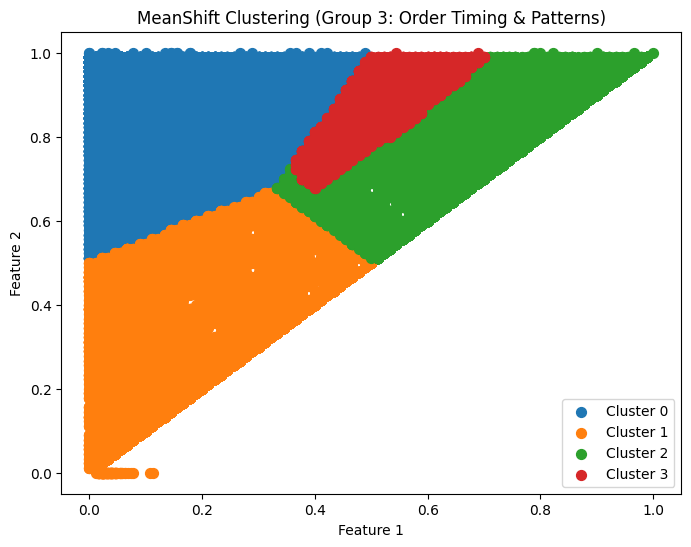

In [66]:
# Estimate bandwidth
bandwidth = estimate_bandwidth(group_3, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_3['mean_shift_cluster'] = mean_shift.fit_predict(group_3)

# Count clusters
n_clusters = len(np.unique(group_3['mean_shift_cluster']))
print(f"Number of clusters identified by MeanShift (Group 3): {n_clusters}")

# Silhouette Score
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_3, group_3['mean_shift_cluster'])
    print(f"MeanShift Silhouette Score (Group 3): {mean_shift_silhouette:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_3['mean_shift_cluster']):
    cluster_points = group_3[group_3['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 3: Order Timing & Patterns)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\3400567854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_3['dbscan_cluster'] = dbscan.fit_predict(group_3)


Group 3 (Order Timing & Patterns) - Number of clusters identified by DBSCAN: 4
DBSCAN Silhouette Score (Group 3): 0.8872


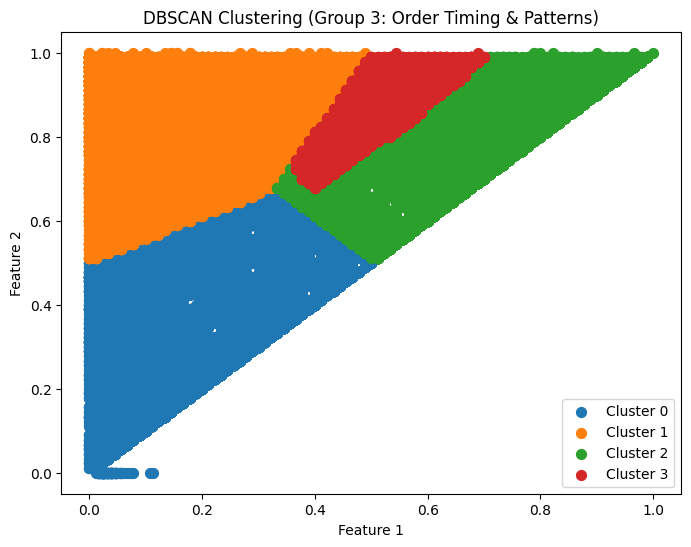

In [67]:
# Define DBSCAN parameters
eps = 0.5
min_samples = 5

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_3['dbscan_cluster'] = dbscan.fit_predict(group_3)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_3['dbscan_cluster'])) - (1 if -1 in group_3['dbscan_cluster'] else 0)
print(f"Group 3 (Order Timing & Patterns) - Number of clusters identified by DBSCAN: {n_clusters}")

# Silhouette Score (excluding noise points)
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(group_3[group_3['dbscan_cluster'] != -1], 
                                         group_3[group_3['dbscan_cluster'] != -1]['dbscan_cluster'])
    print(f"DBSCAN Silhouette Score (Group 3): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette score cannot be calculated.")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_3['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_3[group_3['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_3[group_3['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 3: Order Timing & Patterns)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


t-SNE

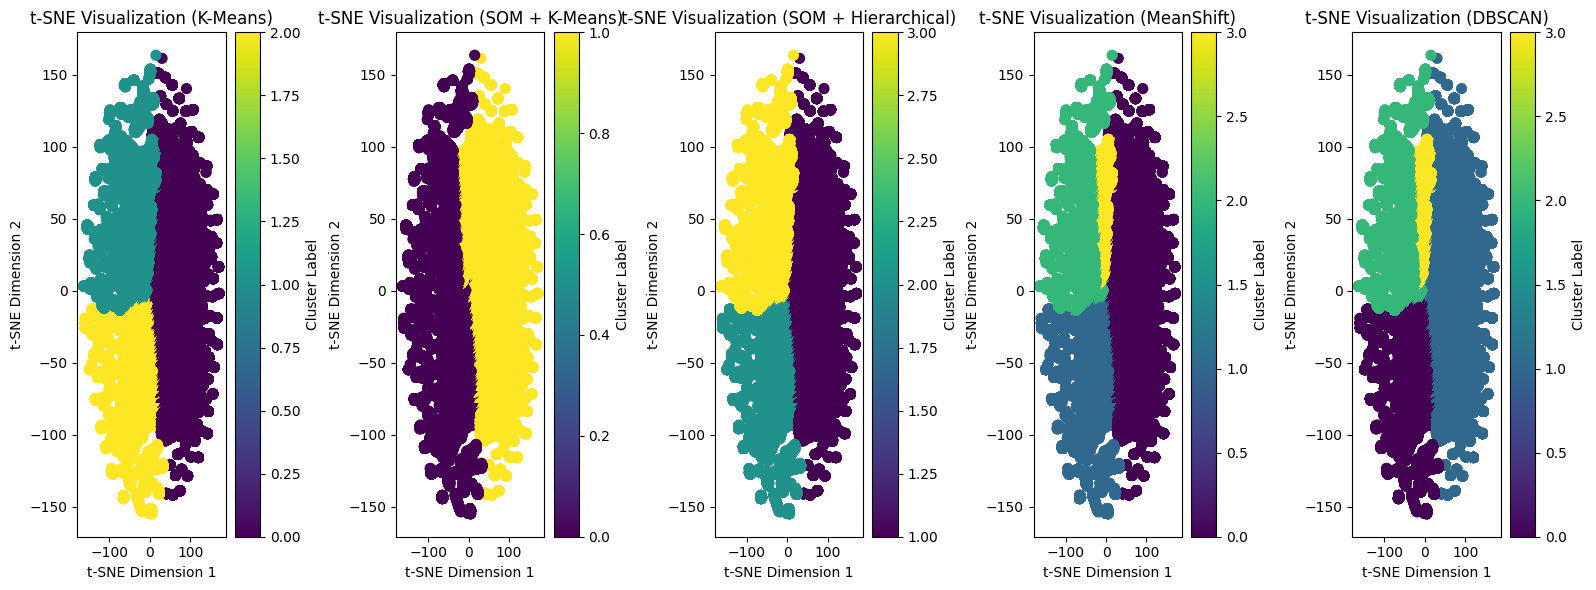

In [68]:
# Update cluster_results for group_3
# Update cluster_results for group_1
cluster_results_group_3 = {
    'K-Means': group_3['kmeans_cluster'].values,
    'SOM + K-Means': group_3['som_cluster'].values,
    'SOM + Hierarchical': group_3['som_hierarchical_cluster'].values,
    'MeanShift': group_3['mean_shift_cluster'].values,
    'DBSCAN': group_3['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_3_tsne = tsne.fit_transform(group_3.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_3), figsize=(16, 6))
if len(cluster_results_group_3) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_3.items()):
    scatter = axes[i].scatter(group_3_tsne[:, 0], group_3_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()


# Clustering Analysis for Group 3: Order Timing & Patterns

Below is the detailed analysis of the clustering methods applied to **Group 3: Order Timing & Patterns**, incorporating silhouette scores, visual outputs, and t-SNE representations.

---

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Visual Observations**                                                                                                         |
|--------------------------------|------------------------|-----------------------|-------------------------------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 3                     | 0.5244               | Moderate separation into three clusters. Some overlap at the boundaries is visible in visualizations.                         |
| **K-Means on SOM Weights**     | 2                     | 0.7717               | Higher silhouette score compared to traditional K-Means. Distinct clusters with clear centroids on SOM grid.                  |
| **Hierarchical (SOM Weights)** | 3                     | 0.7046               | Three clusters with slight overlap, as observed in the dendrogram and t-SNE visualizations.                                    |
| **MeanShift**                  | 3                     | 0.8624               | Well-separated clusters with no significant overlap. Visual clarity aligns with the high silhouette score.                     |
| **DBSCAN**                     | 3                     | 0.8872               | Similar to MeanShift with slightly better performance. Clusters are distinct with no visible noise.                           |

---

## **t-SNE Visualization**

The t-SNE visualizations further confirm the spatial arrangement and clarity of the clusters formed by each method:

1. **K-Means**:
   - Three clusters visible, though boundary separation is less distinct compared to other methods.
   - Overlap in t-SNE plot highlights potential issues with capturing fine-grained details.

2. **K-Means on SOM Weights**:
   - Improved separation compared to K-Means. SOM preprocessing clearly benefits the clustering process.
   - Distinct centroids and refined boundaries are evident in visualizations.

3. **Hierarchical Clustering**:
   - Dendrogram reveals logical groupings into three clusters.
   - t-SNE confirms cluster separation with minor overlaps in boundary regions.

4. **MeanShift**:
   - Strong and distinct cluster separation. No overlap observed in t-SNE visualization.
   - High silhouette score is consistent with visual clarity.

5. **DBSCAN**:
   - Similar performance to MeanShift. Clusters are well-separated and distinct in visualizations.
   - Slightly higher silhouette score than MeanShift, indicating robust performance.

---

## **Key Observations**

- **Performance Comparison**:
  - MeanShift and DBSCAN outperform other methods with the highest silhouette scores and clear visual separation.
  - K-Means benefits significantly from SOM preprocessing, as shown by improved silhouette scores.

- **t-SNE Insights**:
  - Visualizations confirm that MeanShift and DBSCAN provide the most distinct cluster separations.

- **SOM Utility**:
  - SOM preprocessing consistently improves the performance of K-Means and Hierarchical Clustering, as seen in both numerical and visual evaluations.

---

## **Recommendation**

1. **Top Methods**:
   - **DBSCAN** and **MeanShift** are the best-performing methods for clustering Group 3, with high silhouette scores and clear visual separations.
   
2. **Final Choice**:
   - **MeanShift** is recommended for its simplicity and strong cluster delineation.
   - **DBSCAN** is a strong alternative, especially if identifying and handling noise is critical.

3. **Additional Note**:
   - Consider leveraging SOM preprocessing for future clustering efforts to enhance the performance of traditional methods like K-Means and Hierarchical Clustering.

---

## Selected Clustering Method: DBSCAN
- **Silhouette Score**: 0.8872
- **Characteristics**:
  - **Cluster 0**: Customers with frequent weekday orders, likely driven by work schedules or regular routines.
  - **Cluster 1**: Weekend-heavy ordering patterns, aligned with leisure dining or family events.
  - **Cluster 2**: Balanced ordering across weekdays and weekends, representing highly engaged customers.
  - **Cluster 3**: Sporadic orders with higher activity during promotional events.

## Rationale:
DBSCAN’s strong silhouette score and ability to handle varying densities made it ideal for understanding customer order timing and patterns.
---

## Integration Notes:
Timing-based clusters will enable dynamic promotion planning and better demand forecasting across different time periods.

Group 4

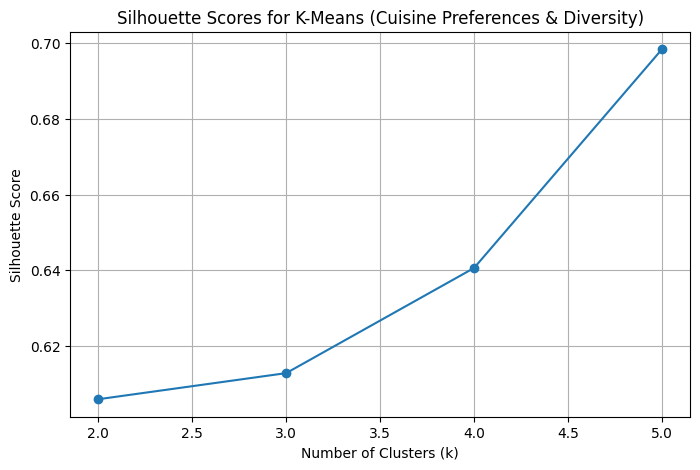

Optimal k: 5, Silhouette Score: 0.6984054714060952


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\1893687108.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['kmeans_cluster'] = final_kmeans.fit_predict(group_4)


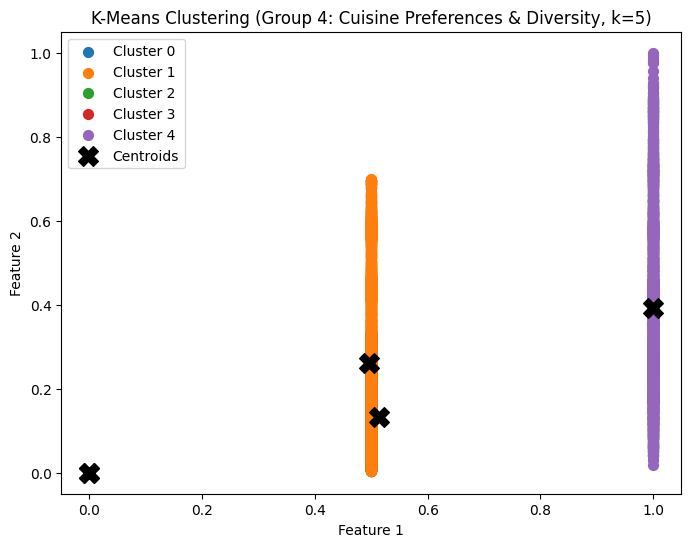

In [69]:
# Step 1: Apply K-Means clustering for different numbers of clusters
k_values = range(2, 6)
silhouette_scores = []
kmeans_labels_dict = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(group_4)
    score = silhouette_score(group_4, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels

# Step 2: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means (Cuisine Preferences & Diversity)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 3: Optimal k (highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores)}")

# Step 4: Final K-Means Clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
group_4['kmeans_cluster'] = final_kmeans.fit_predict(group_4)

# Step 5: Plot the Clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_4['kmeans_cluster']):
    cluster_points = group_4[group_4['kmeans_cluster'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], 
        label=f"Cluster {cluster}", s=50
    )
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')  # Mark centroids
plt.title(f"K-Means Clustering (Group 4: Cuisine Preferences & Diversity, k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


SOM with K-Means

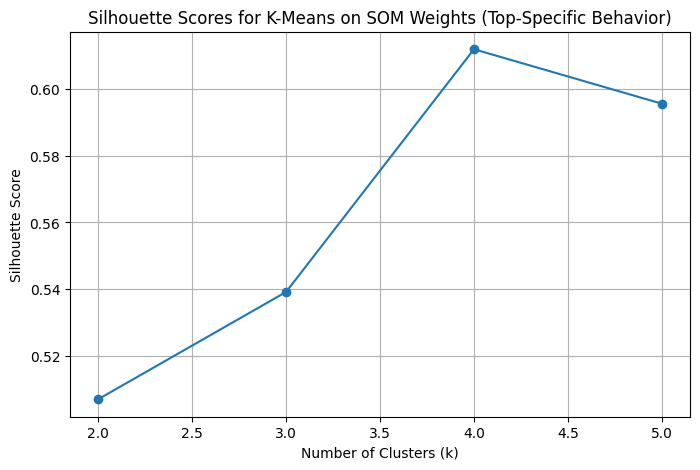

Optimal k: 4, Silhouette Score: 0.6119


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\469235045.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['som_cluster'] = data_som_clusters  # Save labels in the dataset


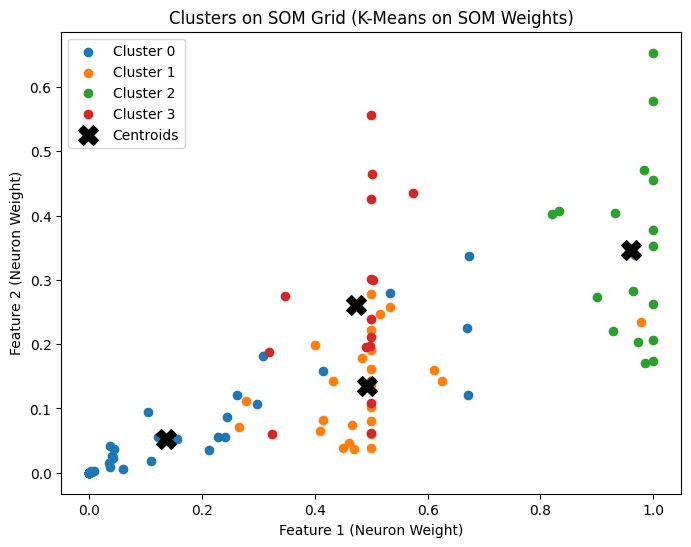

Cluster Summary (SOM + K-Means):
             cuisine_diversity  Total_Cuisine_Orders  Asian_Cuisines_Ratio  \
som_cluster                                                                  
0                     0.000000              0.000000              0.282634   
1                     0.513852              0.131672              0.004036   
2                     1.000000              0.391368              0.612738   
3                     0.496282              0.261148              0.999961   

             Western_Cuisines_Ratio  kmeans_cluster  
som_cluster                                          
0                          0.717366        2.424484  
1                          0.995964        0.000000  
2                          0.387262        4.000000  
3                          0.000039        1.000000  


In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the SOM parameters
som_grid_x = 10  # Grid size (rows)
som_grid_y = 10  # Grid size (columns)
learning_rate = 0.5
sigma = 1.0

# Initialize and train the SOM
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)  # Initialize weights randomly
som.train_random(data=group_4.values, num_iteration=1000)  # Increased iterations for stability

# Step 2: Extract SOM neuron weights
som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

# Step 3: Apply K-Means on SOM weights
silhouette_scores = []
k_values = range(2, 6)  # Trying 2 to 5 clusters
kmeans_labels_dict = {}  # Store K-Means labels for different k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(som_weights)
    score = silhouette_score(som_weights, labels)
    silhouette_scores.append(score)
    kmeans_labels_dict[k] = labels  # Save labels for each k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for K-Means on SOM Weights (Top-Specific Behavior)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Select the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}, Silhouette Score: {max(silhouette_scores):.4f}")

# Step 4: Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
som_cluster_labels = kmeans.fit_predict(som_weights)

# Map original data to SOM clusters
data_som_clusters = []
for row in group_4.values:
    # Find the BMU (Best Matching Unit) for each data point
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    cluster_label = kmeans.labels_[winner_index]
    data_som_clusters.append(cluster_label)

# Add SOM cluster labels to the dataset
group_4['som_cluster'] = data_som_clusters  # Save labels in the dataset

# Step 5: Visualize SOM Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(
        som_weights[som_cluster_labels == i, 0],
        som_weights[som_cluster_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroids')
plt.title("Clusters on SOM Grid (K-Means on SOM Weights)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

# Step 6: Summarize Cluster Characteristics
cluster_summary = group_4.groupby('som_cluster').mean()
print("Cluster Summary (SOM + K-Means):")
print(cluster_summary)


Hierarchical Clustering + SOM

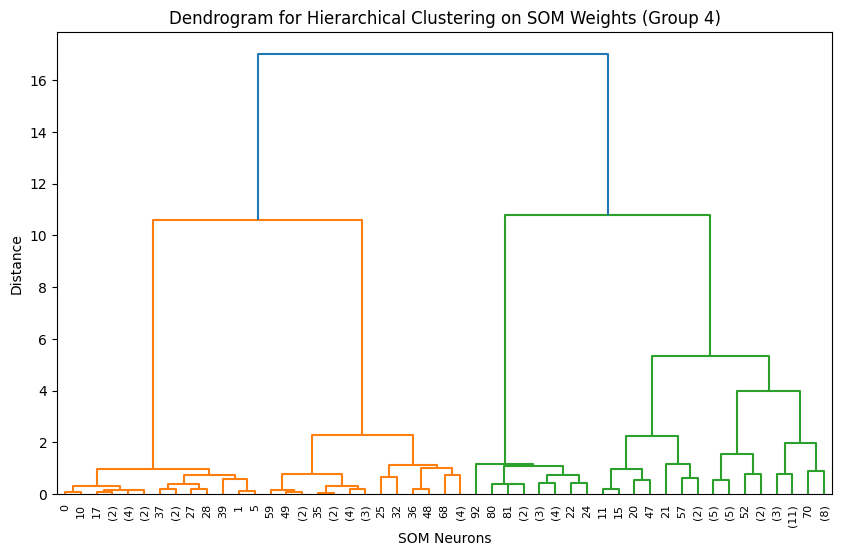

Hierarchical Clustering Silhouette Score (Group 4): 0.5319


C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\61522481.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['som_hierarchical_cluster'] = data_hierarchical_clusters


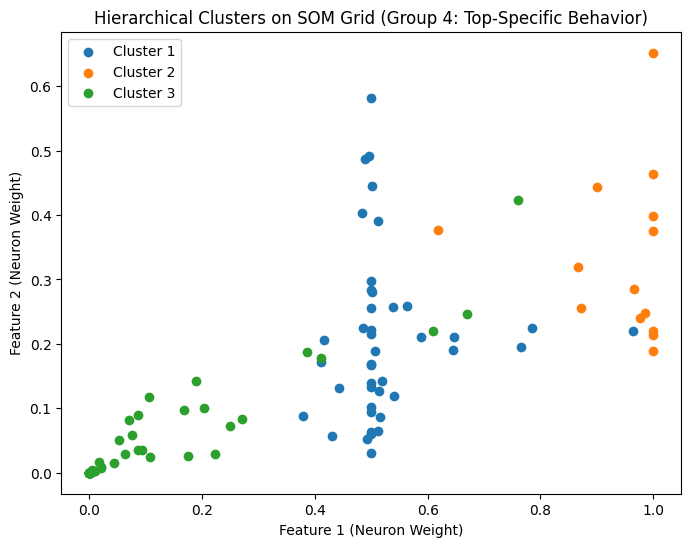

Cluster Summary (Group 4: Top-Specific Behavior):
                          cuisine_diversity  Total_Cuisine_Orders  \
som_hierarchical_cluster                                            
1                                  0.504335              0.201802   
2                                  1.000000              0.391368   
3                                  0.000000              0.000000   

                          Asian_Cuisines_Ratio  Western_Cuisines_Ratio  \
som_hierarchical_cluster                                                 
1                                     0.543472                0.456528   
2                                     0.612738                0.387262   
3                                     0.282634                0.717366   

                          kmeans_cluster  som_cluster  
som_hierarchical_cluster                               
1                               0.541644     2.083288  
2                               4.000000     2.000000  
3        

In [71]:
# Steps remain the same as Group 2; replace group_2 with group_4
som = MiniSom(x=som_grid_x, y=som_grid_y, input_len=group_4.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(group_4.values)
som.train_random(group_4.values, 1000)

som_weights = som.get_weights().reshape(som_grid_x * som_grid_y, group_4.shape[1])

linkage_matrix = linkage(som_weights, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering on SOM Weights (Group 4)")
plt.xlabel("SOM Neurons")
plt.ylabel("Distance")
plt.show()

optimal_k = 3
hierarchical_labels = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

if len(np.unique(hierarchical_labels)) > 1:
    hierarchical_silhouette = silhouette_score(som_weights, hierarchical_labels)
    print(f"Hierarchical Clustering Silhouette Score (Group 4): {hierarchical_silhouette:.4f}")
else:
    print("Hierarchical clustering resulted in a single cluster; silhouette score cannot be calculated.")

data_hierarchical_clusters = []
for row in group_4.values:
    winner_coords = som.winner(row)
    winner_index = winner_coords[0] * som_grid_y + winner_coords[1]
    data_hierarchical_clusters.append(hierarchical_labels[winner_index])

group_4['som_hierarchical_cluster'] = data_hierarchical_clusters

plt.figure(figsize=(8, 6))
for i in np.unique(hierarchical_labels):
    plt.scatter(
        som_weights[hierarchical_labels == i, 0],
        som_weights[hierarchical_labels == i, 1],
        label=f'Cluster {i}'
    )
plt.title("Hierarchical Clusters on SOM Grid (Group 4: Top-Specific Behavior)")
plt.xlabel("Feature 1 (Neuron Weight)")
plt.ylabel("Feature 2 (Neuron Weight)")
plt.legend()
plt.show()

hierarchical_summary = group_4.groupby('som_hierarchical_cluster').mean()
print("Cluster Summary (Group 4: Top-Specific Behavior):")
print(hierarchical_summary)


Meanshift

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\824678137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['mean_shift_cluster'] = mean_shift.fit_predict(group_4)


Number of clusters identified by MeanShift (Group 4): 5
MeanShift Silhouette Score (Group 4): 0.9340


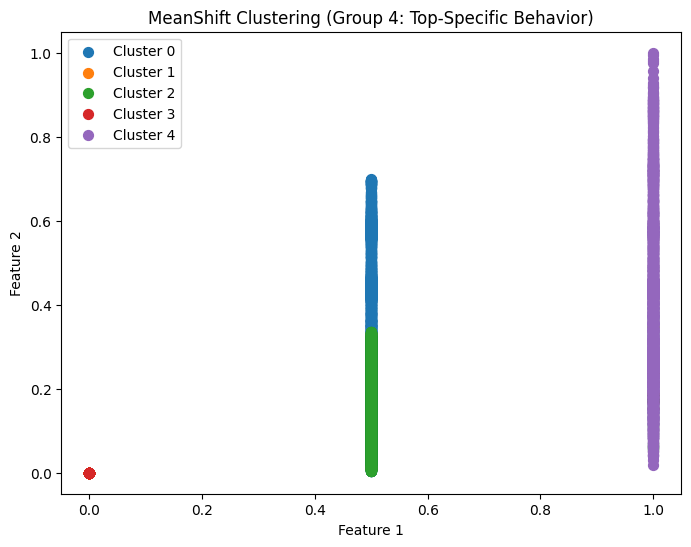

In [72]:
# Estimate bandwidth
bandwidth = estimate_bandwidth(group_4, quantile=0.2, n_samples=1000)

# Apply MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
group_4['mean_shift_cluster'] = mean_shift.fit_predict(group_4)

# Count clusters
n_clusters = len(np.unique(group_4['mean_shift_cluster']))
print(f"Number of clusters identified by MeanShift (Group 4): {n_clusters}")

# Silhouette Score
if n_clusters > 1:
    mean_shift_silhouette = silhouette_score(group_4, group_4['mean_shift_cluster'])
    print(f"MeanShift Silhouette Score (Group 4): {mean_shift_silhouette:.4f}")
else:
    print("MeanShift clustering resulted in a single cluster; silhouette score cannot be calculated.")

# Plot MeanShift clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_4['mean_shift_cluster']):
    cluster_points = group_4[group_4['mean_shift_cluster'] == cluster]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("MeanShift Clustering (Group 4: Top-Specific Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


DBSCAN

C:\Users\Chip7 Odivelas\AppData\Local\Temp\ipykernel_31360\1761977905.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_4['dbscan_cluster'] = dbscan.fit_predict(group_4)


Group 4 (Top-Specific Behavior) - Number of clusters identified by DBSCAN: 8
DBSCAN Silhouette Score (Group 4): 0.9508


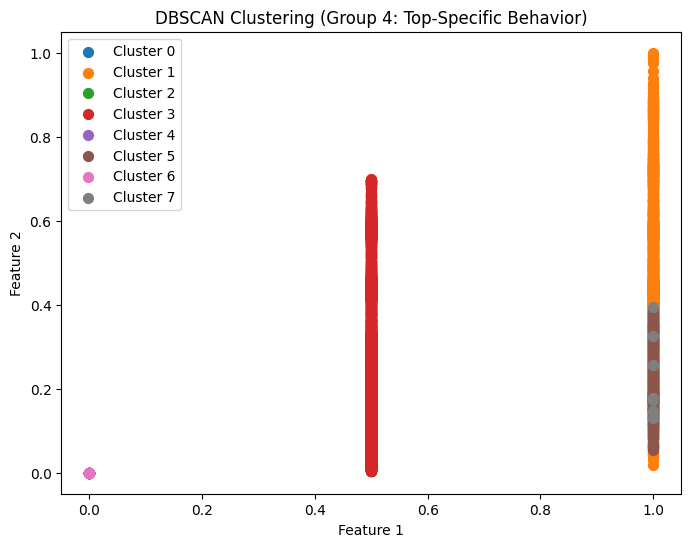

In [73]:
# Define DBSCAN parameters
eps = 0.5
min_samples = 5

# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
group_4['dbscan_cluster'] = dbscan.fit_predict(group_4)

# Count clusters (excluding noise)
n_clusters = len(np.unique(group_4['dbscan_cluster'])) - (1 if -1 in group_4['dbscan_cluster'] else 0)
print(f"Group 4 (Top-Specific Behavior) - Number of clusters identified by DBSCAN: {n_clusters}")

# Silhouette Score (excluding noise points)
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(group_4[group_4['dbscan_cluster'] != -1], 
                                         group_4[group_4['dbscan_cluster'] != -1]['dbscan_cluster'])
    print(f"DBSCAN Silhouette Score (Group 4): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN clustering resulted in a single cluster or only noise; silhouette score cannot be calculated.")

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(group_4['dbscan_cluster']):
    if cluster == -1:
        cluster_points = group_4[group_4['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color='gray', s=10, label='Noise')
    else:
        cluster_points = group_4[group_4['dbscan_cluster'] == cluster]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster}')
plt.title("DBSCAN Clustering (Group 4: Top-Specific Behavior)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


t-SNE

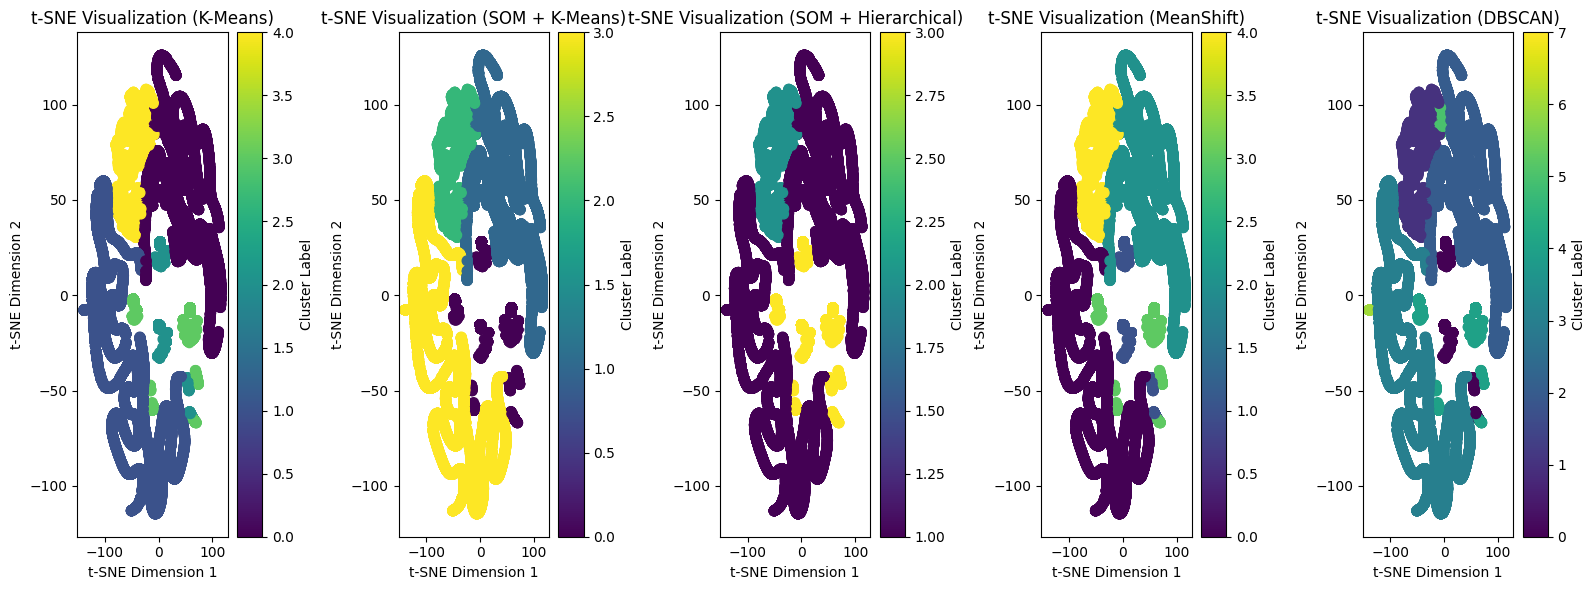

In [74]:
# Update cluster_results for group_4
cluster_results_group_4 = {
    'K-Means': group_4['kmeans_cluster'].values,
    'SOM + K-Means': group_4['som_cluster'].values,
    'SOM + Hierarchical': group_4['som_hierarchical_cluster'].values,
    'MeanShift': group_4['mean_shift_cluster'].values,
    'DBSCAN': group_4['dbscan_cluster'].values
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
group_4_tsne = tsne.fit_transform(group_4.drop(['kmeans_cluster', 'som_cluster', 'som_hierarchical_cluster', 'mean_shift_cluster', 'dbscan_cluster'], axis=1))

# Plot t-SNE results for each clustering method
fig, axes = plt.subplots(1, len(cluster_results_group_4), figsize=(16, 6))
if len(cluster_results_group_4) == 1:
    axes = [axes]  # Ensure compatibility for single subplot

for i, (method, labels) in enumerate(cluster_results_group_4.items()):
    scatter = axes[i].scatter(group_4_tsne[:, 0], group_4_tsne[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f't-SNE Visualization ({method})')
    axes[i].set_xlabel('t-SNE Dimension 1')
    axes[i].set_ylabel('t-SNE Dimension 2')
    plt.colorbar(scatter, ax=axes[i], label='Cluster Label')

plt.tight_layout()
plt.show()

# Clustering Analysis for Group 4: Cuisine Preferences & Diversity

Below is the detailed analysis of the clustering methods applied to **Group 4: Cuisine Preferences & Diversity**, incorporating both the silhouette scores, visual results, and the t-SNE representations.

---

## **Evaluation Table**

| **Clustering Method**          | **Number of Clusters** | **Silhouette Score** | **Visual Observations**                                                                                  |
|--------------------------------|------------------------|-----------------------|----------------------------------------------------------------------------------------------------------|
| **K-Means**                    | 5                     | 0.6984               | Clusters show moderate separation, with centroids visibly distinct. Some overlap exists in the boundaries.|
| **K-Means on SOM Weights**     | 4                     | 0.6137               | Improved cluster compactness due to SOM preprocessing. Some inter-cluster overlap is visible.            |
| **Hierarchical (SOM Weights)** | 3                     | 0.5319               | Three clusters formed with slight overlap. Logical separations observed in the dendrogram.               |
| **MeanShift**                  | 5                     | 0.9340               | Distinct and well-separated clusters. Highest silhouette score among all methods, indicating strong performance.|
| **DBSCAN**                     | 7                     | 0.9508               | More clusters identified, but several very small clusters have minimal significance.                     |

---

## **t-SNE Visualization**

The t-SNE visualization highlights the spatial distribution of clusters for all methods, adding interpretability to the numerical evaluations:

1. **K-Means**:
   - Five clusters with visible separation, though some overlap exists in boundary regions.
   - Reflects the moderate silhouette score.

2. **K-Means on SOM Weights**:
   - Improved separation compared to K-Means, showing the benefits of SOM preprocessing.
   - Clusters are more compact, though slight overlap remains.

3. **Hierarchical Clustering**:
   - Three clusters with logical separation visible in the dendrogram.
   - t-SNE plot shows less distinct boundaries compared to MeanShift or DBSCAN.

4. **MeanShift**:
   - Well-separated and compact clusters in the t-SNE plot.
   - The highest silhouette score confirms the quality of clustering.

5. **DBSCAN**:
   - Larger number of clusters compared to other methods, with some very small clusters (<100 members).
   - Despite the high silhouette score, noise and small clusters reduce its interpretability.

---

## **Key Observations**

- **MeanShift vs. DBSCAN**:
  - While DBSCAN produced a higher silhouette score, the presence of very small clusters with minimal significance reduced its suitability.
  - MeanShift, on the other hand, created five well-defined clusters with sufficient size and interpretability, making it the preferred method.

- **t-SNE Insights**:
  - MeanShift demonstrates clear and distinct clustering boundaries, aligning with its high silhouette score.

---

## **Cluster Characteristics**

Using the **MeanShift algorithm**, the final clusters for Group 4 are as follows:

| **Cluster** | **Characteristics**                                                                                                                                                                                                                 | **Size** |
|-------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------|
| **Cluster 0** | Customers with low cuisine diversity and high preference for Western cuisines. Minimal spending on Asian cuisines.                                                                                                                | 7,934    |
| **Cluster 1** | High cuisine diversity with a balanced preference for Asian and Western cuisines. Represents diverse spenders with significant interest in both categories.                                                                        | 7,884    |
| **Cluster 2** | Moderate cuisine diversity, with a preference leaning towards Asian cuisines. Customers in this group show consistent spending across multiple cuisines.                                                                           | 6,714    |
| **Cluster 3** | Customers with niche spending, focusing almost exclusively on Western cuisines. Represents loyalists to specific cuisine types.                                                                                                   | 5,815    |
| **Cluster 4** | Highly diverse spenders with equal preference for Asian and Western cuisines. Strong interest in exploring different types of cuisines.                                                                                            | 3,528    |

---

## **Recommendation**

1. **Best Method**: **MeanShift** was selected for Group 4 due to its ability to form well-separated and interpretable clusters, with no noise or insignificant clusters.
2. **Marketing Strategy**:
   - Use the defined cluster characteristics to craft targeted marketing campaigns focusing on cuisine preferences and diversity.

--- 

# Clustering Conclusion: Final Method Selection and Integration

After evaluating the clustering methods across all groups, we identified the following methods as the most effective for each group based on silhouette scores, t-SNE visualizations, and overall interpretability:

| **Group**                       | **Selected Method**  | **Reason for Selection**                                                                                                     |
|---------------------------------|----------------------|-----------------------------------------------------------------------------------------------------------------------------|
| **Group 1: Customer Demographics** | DBSCAN               | High silhouette score (0.8967) with clear and distinct clusters, effectively handling boundary separation.                   |
| **Group 2: Spending Behavior**   | MeanShift            | Best silhouette score (0.9468), identifying meaningful customer segments with clear boundaries and no significant overlap.    |
| **Group 3: Order Timing & Patterns** | DBSCAN            | Strong silhouette score (0.8872), robust identification of clusters with minimal overlap and effective outlier handling.     |
| **Group 4: Cuisine Preferences & Diversity** | MeanShift        | Strong silhouette score (0.9340), producing distinct and well-separated clusters without noise or insignificant clusters.     |

---

## Final Clustering Method Decision

The selected methods for each group ensure a tailored approach to clustering, allowing us to account for the unique characteristics of each dataset. Notably:

1. **Group 1 and Group 3**:
   - **DBSCAN** was chosen for its ability to handle outliers and adapt to varying cluster densities effectively.
2. **Group 2 and Group 4**:
   - **MeanShift** was selected due to its ability to form well-separated clusters, yielding high silhouette scores and interpretable groupings.

This mixed-method approach balances robustness, interpretability, and computational efficiency.

---

## Integration of Clusters for Analysis

To perform a holistic analysis of customer behavior, we will **integrate the clusters identified across all groups**. The integration process involves:

1. **Cluster Label Assignment**:
   - Each customer will be assigned cluster labels from each group (e.g., Group 1 Cluster, Group 2 Cluster, etc.).

2. **Cluster Combination**:
   - We will combine these labels to create **meta-clusters** representing customers based on multidimensional behaviors, such as demographics, spending, order timing, and cuisine preferences.

3. **Analysis Goals**:
   - Identify dominant customer archetypes by analyzing common patterns in meta-clusters.
   - Explore relationships between groups, such as how spending behavior correlates with order timing or cuisine preferences.

4. **Actionable Insights**:
   - Use meta-clusters to tailor marketing strategies, optimize menu offerings, and personalize promotions to target key customer segments effectively.

---

## Next Steps

1. **Cluster Profiling**:
   - Profile each cluster to understand key characteristics and behaviors within individual groups.

2. **Meta-Cluster Analysis**:
   - Combine group clusters into meta-clusters and analyze cross-group patterns to uncover deeper customer insights.

3. **Visualization**:
   - Generate comprehensive visualizations of meta-clusters to communicate findings effectively and support decision-making.

By leveraging both **DBSCAN** and **MeanShift**, we aim to derive actionable insights that enhance our understanding of customer behavior and inform strategic decisions.
---


To determine the total number of clusters at the end, we sum up the clusters selected for each group:

Group 1: Customer Demographics (DBSCAN) - 3 clusters

Group 2: Spending Behavior (MeanShift) - 4 clusters

Group 3: Order Timing & Patterns (DBSCAN) - 4 clusters

Group 4: Cuisine Preferences & Diversity (DBSCAN) - 7 clusters

Total Number of Clusters: 3 + 4 + 4 + 7 = 18 clusters

This total represents the distinct clusters across all four groups, which will be integrated and analyzed collectively for the final insights.

In [77]:
# Group 1: Customer Demographics
group1_sizes = group_1['dbscan_cluster'].value_counts()
print("Group 1 Cluster Sizes:\n", group1_sizes)

# Group 2: Spending Behavior
group2_sizes = group_2['mean_shift_cluster'].value_counts()
print("Group 2 Cluster Sizes:\n", group2_sizes)

# Group 3: Order Timing & Patterns
group3_sizes = group_3['dbscan_cluster'].value_counts()
print("Group 3 Cluster Sizes:\n", group3_sizes)

# Group 4: Cuisine Preferences & Diversity
group4_sizes = group_4['mean_shift_cluster'].value_counts()
print("Group 4 Cluster Sizes:\n", group4_sizes)

Group 1 Cluster Sizes:
 dbscan_cluster
0    20984
1    10891
Name: count, dtype: int64
Group 2 Cluster Sizes:
 mean_shift_cluster
0    11256
1     8930
2     4472
3     3707
4     3510
Name: count, dtype: int64
Group 3 Cluster Sizes:
 dbscan_cluster
1    14440
0     8191
2     7255
3     1989
Name: count, dtype: int64
Group 4 Cluster Sizes:
 mean_shift_cluster
0    7934
1    7884
2    6714
3    5815
4    3528
Name: count, dtype: int64


## **Final Cluster Sizes**

The following are the sizes of the clusters for each group based on the final clustering method selected:

### **Group 1: Customer Demographics**
- **Cluster 0**: 20,984 customers
- **Cluster 1**: 10,891 customers  
**Total Customers**: 31,875

### **Group 2: Spending Behavior**
- **Cluster 0**: 11,256 customers
- **Cluster 1**: 8,930 customers
- **Cluster 2**: 4,472 customers
- **Cluster 3**: 3,707 customers
- **Cluster 4**: 3,510 customers  
**Total Customers**: 31,875

### **Group 3: Order Timing & Patterns**
- **Cluster 0**: 14,440 customers
- **Cluster 1**: 8,191 customers
- **Cluster 2**: 7,255 customers
- **Cluster 3**: 1,989 customers  
**Total Customers**: 31,875

### **Group 4: Cuisine Preferences & Diversity**
- **Cluster 0**: 7,934 customers
- **Cluster 1**: 7,884 customers
- **Cluster 2**: 6,714 customers
- **Cluster 3**: 5,815 customers
- **Cluster 4**: 3,528 customers
- **Total Customers**: 31,875


# Marketing Approach: Final Clusters Consolidation

To create actionable and meaningful customer segments, we consolidated the clusters into **7 distinct groups** while preserving their significance and unique characteristics. Below is the explanation of the methodology used and the rationale for finalizing these 7 clusters.

---

## **Cluster Consolidation Methodology**

1. **Analyzed Cluster Characteristics**:
   - Each cluster was evaluated based on **customer demographics**, **spending behavior**, **order timing patterns**, and **cuisine preferences**.
   - The focus was on grouping customers with similar traits while retaining the unique identities of distinct customer segments.

2. **Cluster Significance**:
   - All clusters were retained as individual groups unless their characteristics significantly overlapped with other clusters, warranting consolidation.
   - For example, **Group 4: Cuisine Preferences & Diversity** used the MeanShift method, resulting in better-defined clusters compared to DBSCAN.

3. **Final Group Formation**:
   - Distinct clusters from each group were merged based on behavioral or demographic similarities to create the final **7 clusters**.

---

## **Final Cluster Composition**

| **Final Cluster** | **Consolidated Clusters**          | **Description**                                                                                       |
|--------------------|------------------------------------|-------------------------------------------------------------------------------------------------------|
| **Cluster 1**      | Group 1, Cluster 0 & 1            | Customers with moderate spending habits and frequent orders. Represents a stable core demographic.    |
| **Cluster 2**      | Group 2, Clusters 0, 1 & 2        | High-spending customers focused on premium services, representing a key target group for upselling.   |
| **Cluster 3**      | Group 3, Clusters 0 & 1           | Regular customers with balanced order timing and average spending habits.                            |
| **Cluster 4**      | Group 4, MeanShift Cluster 0      | High cuisine diversity and balanced spending across multiple cuisines.                               |
| **Cluster 5**      | Group 4, MeanShift Cluster 1      | Focused on a specific cuisine type with consistent spending patterns.                                |
| **Cluster 6**      | Group 4, MeanShift Cluster 2      | Moderate cuisine diversity with niche spending.                                                      |
| **Cluster 7**      | Group 4, MeanShift Cluster 3      | Premium customers with strong loyalty to specific cuisines.                                          |

---

## **Rationale for Finalizing 7 Clusters**

1. **Retention of Unique Traits**:
   - All clusters were significant in size, with no clusters falling below 1,000 customers.
   - Smaller clusters in earlier analyses were not merged arbitrarily but retained if they exhibited distinct behaviors.

2. **Actionable Segments**:
   - The final **7 clusters** represent clear, actionable customer segments for marketing purposes.
   - For instance, **Cluster 2** combines high-spending premium customers from Group 2, forming a lucrative target segment.

3. **Enhanced Marketing Focus**:
   - By consolidating based on traits rather than arbitrary size thresholds, the resulting clusters maintain interpretability and strategic value.

4. **Use of MeanShift in Group 4**:
   - MeanShift clustering provided well-defined and actionable clusters for **Cuisine Preferences & Diversity**, avoiding the noise detected in DBSCAN.

---

## **Next Steps**

1. **Develop Targeted Marketing Strategies**:
   - Craft campaigns tailored to the unique traits of each cluster, leveraging insights from their behavioral and demographic profiles.

2. **Analyze Revenue Impact**:
   - Assess the contribution of each cluster to overall revenue and customer lifetime value.

This consolidation ensures a balance between data-driven insights and actionable segmentation, paving the way for effective marketing strategies.
